In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '912fecf1-60f5-46b9-901e-8aff654ada4c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-11-24T18:13:41.043Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 8845}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10571, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [4]:
import pandas as pd

#This allows you to see all the columns    
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10571,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.955184e+07,1.955184e+07,False,NaN,1,NaN,NaN,None,2023-11-24T18:12:00.000Z,37889.006866,2.169638e+10,5.4317,0.215759,1.681961,3.878224,9.257665,43.824696,45.672646,7.407997e+11,51.5051,7.956691e+11,None,2023-11-24T18:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-24 19:13:45.291566
1,1027,Ethereum,ETH,ethereum,7854,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202460e+08,1.202460e+08,True,NaN,2,NaN,NaN,None,2023-11-24T18:12:00.000Z,2102.919176,1.116969e+10,5.9133,0.052728,2.066492,8.135171,17.397496,32.101729,27.854906,2.528675e+11,17.5809,2.528675e+11,None,2023-11-24T18:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-24 19:13:45.291566
2,825,Tether USDt,USDT,tether,66556,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.851487e+10,9.160995e+10,True,NaN,3,NaN,NaN,None,2023-11-24T18:11:00.000Z,1.000444,3.746999e+10,1.7896,-0.006215,0.033159,0.027899,0.023524,0.047983,0.093913,8.855415e+10,6.1575,9.165061e+10,None,2023-11-24T18:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-24 19:13:45.291566
3,1839,BNB,BNB,bnb,1784,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516997e+08,1.516997e+08,False,NaN,4,NaN,NaN,None,2023-11-24T18:11:00.000Z,233.534810,7.301822e+08,-15.4201,-0.099283,0.450350,-4.178323,3.927484,11.131541,7.872240,3.542716e+10,2.4663,3.542716e+10,None,2023-11-24T18:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-24 19:13:45.291566
4,52,XRP,XRP,xrp,1150,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.381698e+10,9.998820e+10,False,NaN,5,NaN,NaN,None,2023-11-24T18:12:00.000Z,0.619826,1.268724e+09,-6.6040,-0.027381,0.118133,2.403146,10.819452,22.823632,17.959049,3.335717e+10,2.3195,6.198262e+10,None,2023-11-24T18:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-24 19:13:45.291566
5,3408,USDC,USDC,usd-coin,15089,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.454737e+10,2.454737e+10,False,NaN,6,NaN,NaN,None,2023-11-24T18:11:00.000Z,0.999919,4.782945e+09,-4.5683,-0.011478,0.001409,-0.016229,-0.006662,-0.015367,-0.009891,2.454538e+10,1.7088,2.454538e+10,None,2023-11-24T18:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-24 19:13:45.291566
6,5426,Solana,SOL,solana,553,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.232698e+08,5.633295e+08,True,NaN,7,NaN,NaN,None,2023-11-24T18:12:00.000Z,57.933131,1.153607e+09,-38.3662,0.739179,1.509498,0.950834,75.593987,196.226918,185.889091,2.452135e+10,1.7051,3.263544e+10,None,2023-11-24T18:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-24 19:13:45.291566
7,2010,Cardano,ADA,cardano,982,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.529151e+10,3.638042e+10,False,NaN,8,NaN,NaN,None,2023-11-24T18:11:00.000Z,0.389388,3.508967e+08,21.3458,0.258636,1.484111,6.630648,37.222518,58.638775,49.471807,1.374210e+10,0.9555,1.752248e+10,None,2023-11-24T18:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-24 19:13:45.291566
8,74,Dogecoin,DOGE,dogecoin,830,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.419638e+11,1

In [6]:

def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '912fecf1-60f5-46b9-901e-8aff654ada4c',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)
    #df = pd.concat([df2])
    df
    
    if not os.path.isfile(r'C:\Users\user\Music\SAGE\DATA ANALYSIS\Portfolio Projects\Python\Pandas\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\user\Music\SAGE\DATA ANALYSIS\Portfolio Projects\Python\Pandas\Python Scripts\API.csv', header = 'column_names')
    else:     
        df.to_csv(r'C:\Users\user\Music\SAGE\DATA ANALYSIS\Portfolio Projects\Python\Pandas\Python Scripts\API.csv', mode = 'a', header=False)


In [7]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2023-11-24T18:13:47.908Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 8845}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10571, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

UnboundLocalError: cannot access local variable 'data' where it is not associated with a value

In [ ]:
df3 = pd.read_csv(r'C:\Users\user\Music\SAGE\DATA ANALYSIS\Portfolio Projects\Python\Pandas\Python Scripts\API.csv')
df3

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10571,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.955184e+07,1.955184e+07,False,NaN,1,NaN,NaN,None,2023-11-24T18:13:00.000Z,37863.998091,2.169478e+10,5.3854,0.116465,1.605057,3.811977,9.371748,43.728117,45.606559,7.403107e+11,51.4711,7.951440e+11,None,2023-11-24T18:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-24 19:14:48.962032
1,1027,Ethereum,ETH,ethereum,7854,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202460e+08,1.202460e+08,True,NaN,2,NaN,NaN,None,2023-11-24T18:13:00.000Z,2101.556746,1.117371e+10,5.9788,-0.031656,1.999930,8.139402,17.505617,32.005598,27.800301,2.527037e+11,17.5696,2.527037e+11,None,2023-11-24T18:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-24 19:14:48.962032
2,825,Tether USDt,USDT,tether,66556,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.851487e+10,9.160995e+10,True,NaN,3,NaN,NaN,None,2023-11-24T18:12:00.000Z,1.000476,3.747274e+10,1.8030,-0.000358,0.033037,0.031473,0.002472,0.056932,0.088181,8.855701e+10,6.1577,9.165357e+10,None,2023-11-24T18:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-24 19:14:48.962032
3,1839,BNB,BNB,bnb,1784,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516997e+08,1.516997e+08,False,NaN,4,NaN,NaN,None,2023-11-24T18:12:00.000Z,233.508525,7.300707e+08,-15.4420,-0.128352,0.446814,-4.226762,3.927545,11.114598,7.866783,3.542317e+10,2.4628,3.542317e+10,None,2023-11-24T18:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-24 19:14:48.962032
4,52,XRP,XRP,xrp,1150,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.381698e+10,9.998820e+10,False,NaN,5,NaN,NaN,None,2023-11-24T18:13:00.000Z,0.619629,1.267267e+09,-6.7318,-0.119198,0.141449,2.229180,10.875120,22.785855,17.948136,3.334655e+10,2.3187,6.196289e+10,None,2023-11-24T18:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-24 19:14:48.962032
5,3408,USDC,USDC,usd-coin,15089,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.454737e+10,2.454737e+10,False,NaN,6,NaN,NaN,None,2023-11-24T18:13:00.000Z,0.999991,4.782627e+09,-4.5880,0.001031,0.001560,-0.019516,-0.006280,-0.011030,-0.008941,2.454715e+10,1.7067,2.454715e+10,None,2023-11-24T18:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-24 19:14:48.962032
6,5426,Solana,SOL,solana,553,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.232698e+08,5.633295e+08,True,NaN,7,NaN,NaN,None,2023-11-24T18:13:00.000Z,57.961572,1.153062e+09,-38.3889,0.731751,1.711830,0.667659,75.681915,196.483091,186.236615,2.453339e+10,1.7059,3.265146e+10,None,2023-11-24T18:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-24 19:14:48.962032
7,2010,Cardano,ADA,cardano,982,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.529151e+10,3.638042e+10,False,NaN,8,NaN,NaN,None,2023-11-24T18:12:00.000Z,0.389398,3.509273e+08,21.3643,0.239563,1.495857,6.615329,37.252721,58.642573,49.470083,1.374246e+10,0.9556,1.752293e+10,None,2023-11-24T18:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-24 19:14:48.962032
8,74,Dogecoin,DOGE,dogecoin,830,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.419638e+11,1

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10571,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19551837.00000,19551837.00000,False,NaN,1,NaN,NaN,None,2023-11-24T18:13:00.000Z,37863.99809,21694778175.95357,5.38540,0.11647,1.60506,3.81198,9.37175,43.72812,45.60656,740310718839.67163,51.47110,795143959906.83997,None,2023-11-24T18:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-24 19:14:48.962032
1,1027,Ethereum,ETH,ethereum,7854,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120245955.21612,120245955.21612,True,NaN,2,NaN,NaN,None,2023-11-24T18:13:00.000Z,2101.55675,11173712154.27310,5.97880,-0.03166,1.99993,8.13940,17.50562,32.00560,27.80030,252703698413.83124,17.56960,252703698413.82999,None,2023-11-24T18:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-24 19:14:48.962032
2,825,Tether USDt,USDT,tether,66556,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,88514865360.73074,91609951833.45119,True,NaN,3,NaN,NaN,None,2023-11-24T18:12:00.000Z,1.00048,37472741677.03236,1.80300,-0.00036,0.03304,0.03147,0.00247,0.05693,0.08818,88557011807.32985,6.15770,91653572008.74001,None,2023-11-24T18:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-24 19:14:48.962032
3,1839,BNB,BNB,bnb,1784,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151699685.08713,151699685.08713,False,NaN,4,NaN,NaN,None,2023-11-24T18:12:00.000Z,233.50852,730070663.54601,-15.44200,-0.12835,0.44681,-4.22676,3.92755,11.11460,7.86678,35423169638.41076,2.46280,35423169638.41000,None,2023-11-24T18:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-24 19:14:48.962032
4,52,XRP,XRP,xrp,1150,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53816975568.00000,99988203685.00000,False,NaN,5,NaN,NaN,None,2023-11-24T18:13:00.000Z,0.61963,1267266722.65513,-6.73180,-0.11920,0.14145,2.22918,10.87512,22.78585,17.94814,33346554745.34422,2.31870,61962892550.90000,None,2023-11-24T18:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-24 19:14:48.962032
5,3408,USDC,USDC,usd-coin,15089,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24547372936.05137,24547372936.05137,False,NaN,6,NaN,NaN,None,2023-11-24T18:13:00.000Z,0.99999,4782626747.56295,-4.58800,0.00103,0.00156,-0.01952,-0.00628,-0.01103,-0.00894,24547152779.89046,1.70670,24547152779.89000,None,2023-11-24T18:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-24 19:14:48.962032
6,5426,Solana,SOL,solana,553,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,423269836.66650,563329477.59555,True,NaN,7,NaN,NaN,None,2023-11-24T18:13:00.000Z,57.96157,1153062203.04732,-38.38890,0.73175,1.71183,0.66766,75.68191,196.48309,186.23662,24533385203.73856,1.70590,32651462195.64000,None,2023-11-24T18:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-24 19:14:48.962032
7,2010,Cardano,ADA,cardano,982,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35291511417.10300,36380415864.98200,False,NaN,8,NaN,NaN,None,2023-11-24T18:12:00.000Z,0.38940,350927253.82173,21.36430,0.23956,1.49586,6.61533,37.25272,58.64257,49.47008,13742458537.54427,0.95560,17522928584.17000,None,2023-11-24T18:12:00.000Z,NaN,NaN,NaN,Na

In [13]:
df3 = df.groupby('name', sort = False) [['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.11647,1.60506,3.81198,9.37175,43.72812,45.60656
Ethereum,-0.03166,1.99993,8.13940,17.50562,32.00560,27.80030
Tether USDt,-0.00036,0.03304,0.03147,0.00247,0.05693,0.08818
BNB,-0.12835,0.44681,-4.22676,3.92755,11.11460,7.86678
XRP,-0.11920,0.14145,2.22918,10.87512,22.78585,17.94814
USDC,0.00103,0.00156,-0.01952,-0.00628,-0.01103,-0.00894
Solana,0.73175,1.71183,0.66766,75.68191,196.48309,186.23662
Cardano,0.23956,1.49586,6.61533,37.25272,58.64257,49.47008
Dogecoin,0.19348,2.35914,-6.36496,14.69019,27.36510,23.81299


In [14]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.11647
             quote.USD.percent_change_24h     1.60506
             quote.USD.percent_change_7d      3.81198
             quote.USD.percent_change_30d     9.37175
             quote.USD.percent_change_60d    43.72812
             quote.USD.percent_change_90d    45.60656
Ethereum     quote.USD.percent_change_1h     -0.03166
             quote.USD.percent_change_24h     1.99993
             quote.USD.percent_change_7d      8.13940
             quote.USD.percent_change_30d    17.50562
             quote.USD.percent_change_60d    32.00560
             quote.USD.percent_change_90d    27.80030
Tether USDt  quote.USD.percent_change_1h     -0.00036
             quote.USD.percent_change_24h     0.03304
             quote.USD.percent_change_7d      0.03147
             quote.USD.percent_change_30d     0.00247
             quote.USD.percent_change_60d     0.05693
             quote.USD.percent_change_90

In [15]:
type(df4)

pandas.core.series.Series

In [16]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.11647
            quote.USD.percent_change_24h   1.60506
            quote.USD.percent_change_7d    3.81198
            quote.USD.percent_change_30d   9.37175
            quote.USD.percent_change_60d  43.72812
            quote.USD.percent_change_90d  45.60656
Ethereum    quote.USD.percent_change_1h   -0.03166
            quote.USD.percent_change_24h   1.99993
            quote.USD.percent_change_7d    8.13940
            quote.USD.percent_change_30d  17.50562
            quote.USD.percent_change_60d  32.00560
            quote.USD.percent_change_90d  27.80030
Tether USDt quote.USD.percent_change_1h   -0.00036
            quote.USD.percent_change_24h   0.03304
            quote.USD.percent_change_7d    0.03147
            quote.USD.percent_change_30d   0.00247
            quote.USD.percent_change_60d   0.05693
            quote.USD.percent_change_90d   0.08818
BNB         quote.USD.percent_change_1h   -0.12835
            quote.USD.percent_change_24h   0.44681
            quote.USD.percent_change_7d   -4.22676
            quote.USD.percent_change_30d   3.92755
            quote.USD.percent_change_60d  11.11460
            quote.USD.percent_change_90d   7.86678
XRP         quote.USD.percent_change_1h   -0.11920
            quote.USD.percent_change_24h   0.14145
            quote.USD.percent_change_7d    2.22918
            quote.USD.percent_change_30d  10.87512
            quote.USD.percent_change_60d  22.78585
            quote.USD.percent_change_90d  17.94814
USDC        quote.USD.percent_change_1h    0.00103
            quote.USD.percent_change_24h   0.00156
            quote.USD.percent_change_7d   -0.01952
            quote.USD.percent_change_30d  -0.00628
            quote.USD.percent_change_60d  -0.01103
            quote.USD.percent_change_90d  -0.00894
Solana      quote.USD.percent_change_1h    0.73175
            quote.USD.percent_change_24h   1.71183
            quote.USD.percent_change_7d    0.66766
            quote.USD.percent_change_30d  75.68191
            quote.USD.percent_change_60d 196.48309
            quote.USD.percent_change_90d 186.23662
Cardano     quote.USD.percent_change_1h    0.23956
            quote.USD.percent_change_24h   1.49586
            quote.USD.percent_change_7d    6.61533
            quote.USD.percent_change_30d  37.25272
            quote.USD.percent_change_60d  58.64257
            quote.USD.percent_change_90d  49.47008
Dogecoin    quote.USD.percent_change_1h    0.19348
            quote.USD.percent_change_24h   2.35914
            quote.USD.percent_change_7d   -6.36496
            quote.USD.percent_change_30d  14.69019
            quote.USD.percent_change_60d  27.36510
            quote.USD.percent_change_90d  23.81299
TRON        quote.USD.percent_change_1h    0.23057
            quote.USD.percent_change_24h   2.94913
            quote.USD.percent_change_7d    1.85816
            quote.USD.percent_change_30d  11.83244
            quote.USD.percent_change_60d  24.25684
            quote.USD.percent_change_90d  35.46339
Toncoin     quote.USD.percent_change_1h   -0.54310
            quote.USD.percent_change_24h  -0.93215
            quote.USD.percent_change_7d    4.29930
            quote.USD.percent_change_30d  12.55965
            quote.USD.percent_change_60d   9.45833
            quote.USD.percent_change_90d  63.91375
Chainlink   quote.USD.percent_change_1h   -0.16414
            quote.USD.percent_change_24h   0.29137
            quote.USD.percent_change_7d    7.65938
            quote.USD.percent_change_30d  31.87735
            quote.USD.percent_change_60d  94.29731
            quote.USD.percent_change_90d 143.40515
Avalanche   quote.USD.percent_change_1h   -0.00604
            quote.USD.percent_change_24h   1.93080
            quote.USD.percent_change_7d   -0.07406
            quote.USD.percent_change_30d 103.50738
            quote.USD.percent_change_60d 138.10505
            quo

In [17]:
df5.count()

values    90
dtype: int64

In [25]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.11647
1,Bitcoin,quote.USD.percent_change_24h,1.60506
2,Bitcoin,quote.USD.percent_change_7d,3.81198
3,Bitcoin,quote.USD.percent_change_30d,9.37175
4,Bitcoin,quote.USD.percent_change_60d,43.72812
5,Bitcoin,quote.USD.percent_change_90d,45.60656
6,Ethereum,quote.USD.percent_change_1h,-0.03166
7,Ethereum,quote.USD.percent_change_24h,1.99993
8,Ethereum,quote.USD.percent_change_7d,8.13940
9,Ethereum,quote.USD.percent_change_30d,17.50562


In [29]:
df7 = df6.rename(columns = {'level_1' : 'percent_change'})
df7


,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.11647
1,Bitcoin,quote.USD.percent_change_24h,1.60506
2,Bitcoin,quote.USD.percent_change_7d,3.81198
3,Bitcoin,quote.USD.percent_change_30d,9.37175
4,Bitcoin,quote.USD.percent_change_60d,43.72812
5,Bitcoin,quote.USD.percent_change_90d,45.60656
6,Ethereum,quote.USD.percent_change_1h,-0.03166
7,Ethereum,quote.USD.percent_change_24h,1.99993
8,Ethereum,quote.USD.percent_change_7d,8.13940
9,Ethereum,quote.USD.percent_change_30d,17.50562


In [32]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.11647
1,Bitcoin,24h,1.60506
2,Bitcoin,7d,3.81198
3,Bitcoin,30d,9.37175
4,Bitcoin,60d,43.72812
5,Bitcoin,90d,45.60656
6,Ethereum,1h,-0.03166
7,Ethereum,24h,1.99993
8,Ethereum,7d,8.13940
9,Ethereum,30d,17.50562


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


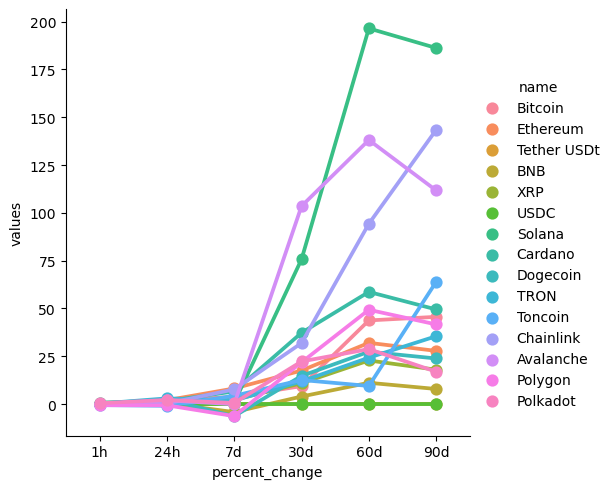

In [34]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [41]:
df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,37863.99809,2023-11-24 19:14:48.962032


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

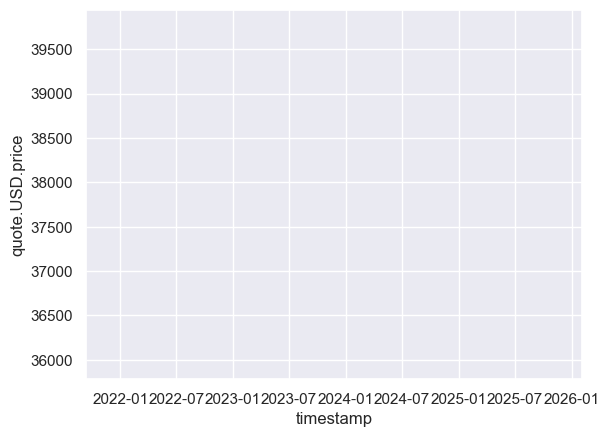

In [42]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)